# <font color='#556b2f'> **Text Categorization with Naive Bayes and Logistic Regression**</font>

**The 20 newsgroups** [data set](http://qwone.com/~jason/20Newsgroups/) is a text data set that contains around 18k posts on 20 topics split into two subsets: training and testing. The split between the train and test set is based upon a messages posted before and after a specific date. This data set can be 'fetched' through [scikit directly](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)

We consider a simpler binary classification task of discriminating whether a specific article/post is about **baseball** or **hockey**. The code below loads and visualizes the data est for this task.

In [2]:
#
# DO NOT EDIT THE CODE BELOW
#

# Load the 20 Newsgroups data
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
categories = ['rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
X_trn = train.data
y_trn = train.target
X_tst = test.data
y_tst = test.target

# The objects 'train' and 'test' above are dictionaries which contain the data, numeric labels, label names and
# other descriptors of the data set. Many scikit data loading functions return similar dictionaries of data.

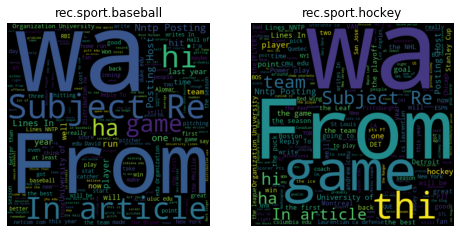

In [3]:
# Visualize the 20 Newsgroups data

# Install the package wordcloud, either by uncommenting the lines 
# below (ONE TIME) or using pip from your command line or using your
# preferred install method
# import sys
# !{sys.executable} -m pip install wordcloud

#
# DO NOT EDIT THE CODE BELOW
#
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8.0, 16.0))
for s in [0, 1]: 
    subset = [X_trn[i] for i in range(len(y_trn)) if y_trn[i] == s]
    subset_words = ' '.join(subset)
    cloud = WordCloud(width=512, height=512).generate(subset_words);
    
    ax = axes[s]
    ax.imshow(cloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(train.target_names[s])

---
###  Setting up Learning Pipelines
Using scikit, we can chain several different pre-processing, training and model selection steps into a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). I will set up two simple pipelines, one for Naive Bayes and one for Logistic Regression. The pipeline we setup is pretty [standard](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) for many text processing applications and contains the following stages:
* A **tokenizer**
* A **transformer** 
* A **classifier** 


In [5]:
#
# DO NOT EDIT THE CODE BELOW.
#
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline for text categorization with Multinomial Naive Bayes
NBpipeline = Pipeline([('vectorizer', CountVectorizer()),
                       ('transformer', TfidfTransformer()),
                       ('classifier', MultinomialNB())])

# Pipeline for text categorization with LogisticRegression using default settings
LRpipeline = Pipeline([('vectorizer', CountVectorizer()),
                       ('transformer', TfidfTransformer()),
                       ('classifier', LogisticRegression(solver='lbfgs'))])

---
###  Modeling and Evaluation (15 points) 
Training both the naive Bayes and logistic regression models using the training data

In [6]:
from sklearn.metrics import classification_report
NB = NBpipeline.fit(X_trn, y_trn)
y_predNB = NB.predict(X_tst)


LR = LRpipeline.fit(X_trn, y_trn)
y_predLR = LR.predict(X_tst)

print(classification_report(y_tst, y_predNB))
print("\n")
print(classification_report(y_tst, y_predLR))



              precision    recall  f1-score   support

           0       0.99      0.94      0.96       397
           1       0.94      0.99      0.97       399

    accuracy                           0.96       796
   macro avg       0.97      0.96      0.96       796
weighted avg       0.97      0.96      0.96       796



              precision    recall  f1-score   support

           0       0.95      0.96      0.95       397
           1       0.96      0.95      0.95       399

    accuracy                           0.95       796
   macro avg       0.95      0.95      0.95       796
weighted avg       0.95      0.95      0.95       796



---
### ROC Curves and Area under the ROC Curve


The AUC_score for Naive Bayes is:  0.9647607684197901
The AUC_score for Logistic Regression is:  0.954779896845388


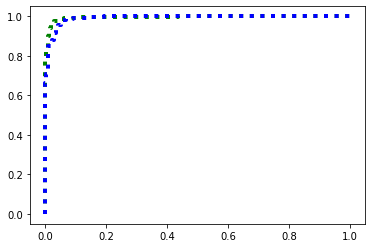

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

probNB = NB.predict_proba(X_tst)
probLR = LR.predict_proba(X_tst)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_tst, probNB[:, 1])
fpr1, tpr1, thresholds1 = roc_curve(y_tst, probLR[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='micro-average ROC curve (area = {0:0.2f})', color='green', linestyle=':', linewidth=4)
plt.plot(fpr1, tpr1, label='macro-average ROC curve (area = {0:0.2f})',color='blue', linestyle=':', linewidth=4)

Sc_NB =roc_auc_score(y_tst, y_predNB)
print("The AUC_score for Naive Bayes is: ",Sc_NB)
Sc_LR =roc_auc_score(y_tst, y_predLR)
print("The AUC_score for Logistic Regression is: ",Sc_LR)

